### Importing necessary libraries

In [295]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [296]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [297]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The data has 340 rows and 15 columns

In [298]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [299]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* The variables are of object,float and integer
* No specific observation noted for any column datatype conversion

In [301]:
# dropping the ticker symbol column as it does not provide any information for modeling
df.drop("Ticker Symbol", axis=1, inplace=True)
# dropping the security/name column of the company as it does not provide any information for modeling
df.drop("Security", axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [302]:
# Standardize column names by replacing spaces with underscore and removing slash in column names
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("/", "")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [303]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340,NaN,NaN,NaN,80.8623,98.0551,4.5,38.555,59.705,92.88,1274.95
Price_Change,340,NaN,NaN,NaN,4.07819,12.0063,-47.1297,-0.939484,4.8195,10.6955,55.0517
Volatility,340,NaN,NaN,NaN,1.52598,0.591798,0.733163,1.13488,1.38559,1.69555,4.58004
ROE,340,NaN,NaN,NaN,39.5971,96.5475,1,9.75,15,27,917
Cash_Ratio,340,NaN,NaN,NaN,70.0235,90.4213,0,18,47,99,958
Net_Cash_Flow,340,NaN,NaN,NaN,5.55376e+07,1.94637e+09,-1.1208e+10,-1.93906e+08,2.098e+06,1.69811e+08,2.0764e+10
Net_Income,340,NaN,NaN,NaN,1.49438e+09,3.94015e+09,-2.3528e+10,3.52301e+08,7.07336e+08,1.899e+09,2.4442e+10
Earnings_Per_Share,340,NaN,NaN,NaN,2.77666,6.58778,-61.2,1.5575,2.895,4.62,50.09


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* There are 11 unique sectors and 104 sub industries
* Stock prices range from 4.5 to 1247.95
* The price changes range from -47.12 to 55.05
* The volatility range from 0.73 to 4.58
* The ROE ranges from 1 to 917
* The cash ratio range from 0 to 958
* The net cash flow values range from -1.1208e+10 to 2.0764e+10
* The net income range from -2.3528e+10 to 2.4442e+1
* The earnings per share range from -61.2 to 50.09
* The estimated shares outstanding range from 2.76722e+07 to 6.15929e+09
* The PE ratio ranges from 2.93545 to 528.039
* The PB ratio ranges from -76.1191 to 129.065

In [304]:
# checking for missing values
df.isna().sum()

GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
PE_Ratio                        0
PB_Ratio                        0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* No missing values found in the data

## EDA

### Univariate Analysis

In [305]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

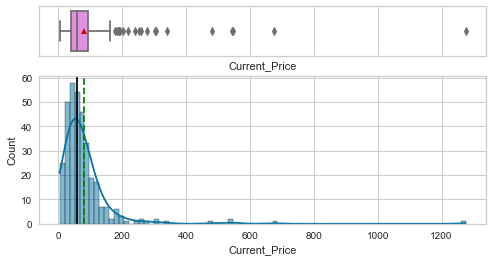

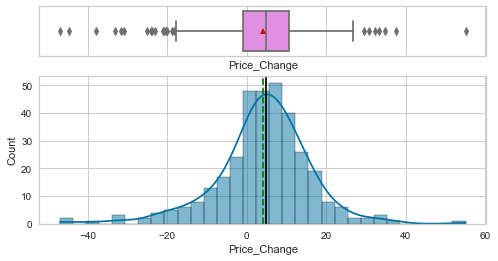

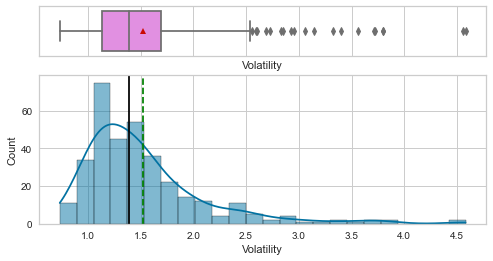

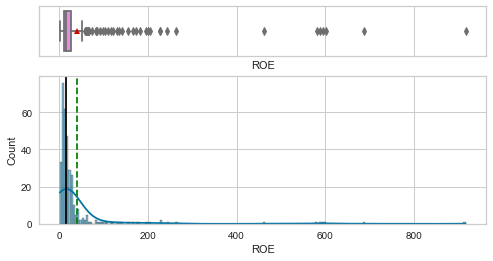

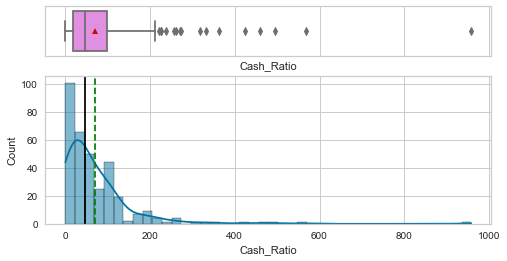

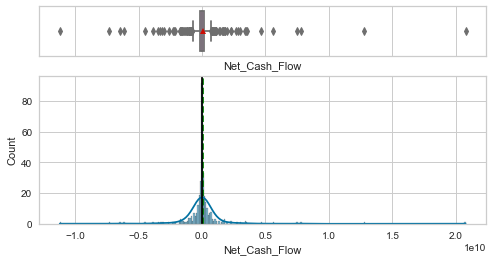

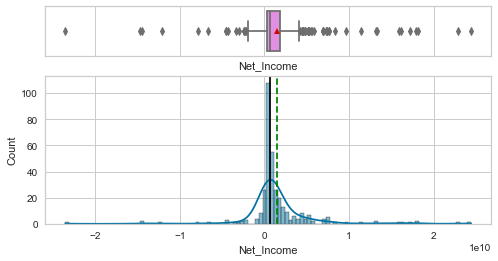

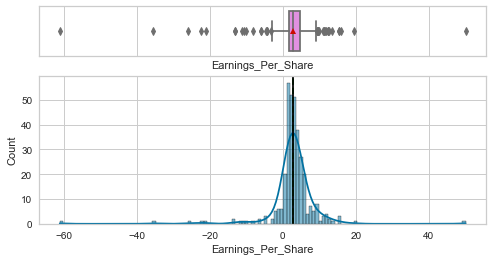

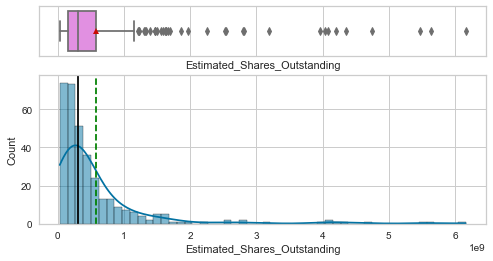

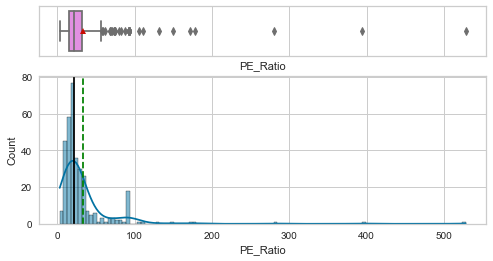

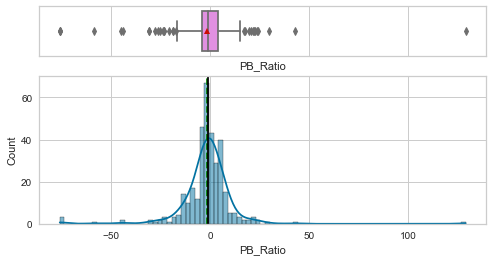

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [306]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

* Observations
* The current price has outliers to the right. The distribution is not uniform and hence we will have to scale this variable
* The price changes has outliers to the left and right. The distribution is close to normal forming a bell curve
* Volatility has outliers to the right. The distribution is not uniform and hence we will have to scale this variable
* The ROE has outliers to the right. The distribution is not uniform and hence we will have to scale this variable
* The cash ratio has outliers to the right. The distribution is not uniform and hence we will have to scale this variable
* The net cash flow has outliers to the left and right.The distribution is close to normal forming a bell curve
* The net income has outliers to the left and right.The distribution is close to normal forming a bell curve
* The earnings per share has outliers to the left and right.The distribution is not uniform and hence we will have to scale this variable
* The estimates shares outstanding has outliers to the right.The distribution is not uniform and hence we will have to scale this variable 
* The PE ratio has outliers to the right.The distribution is not uniform and hence we will have to scale this variable 
* The PB ratio has outliers to the right and left. The distribution is close to normal forming a bell curve

In [307]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [308]:
# selecting categorical columns
cat_col = df.select_dtypes(include=np.object).columns.tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

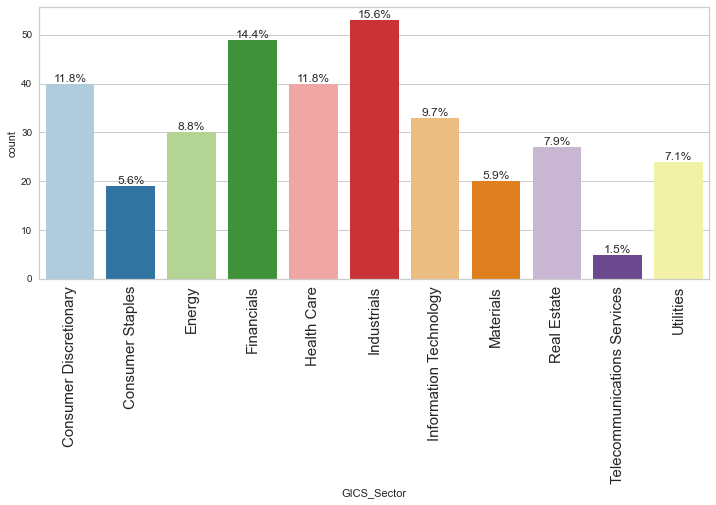

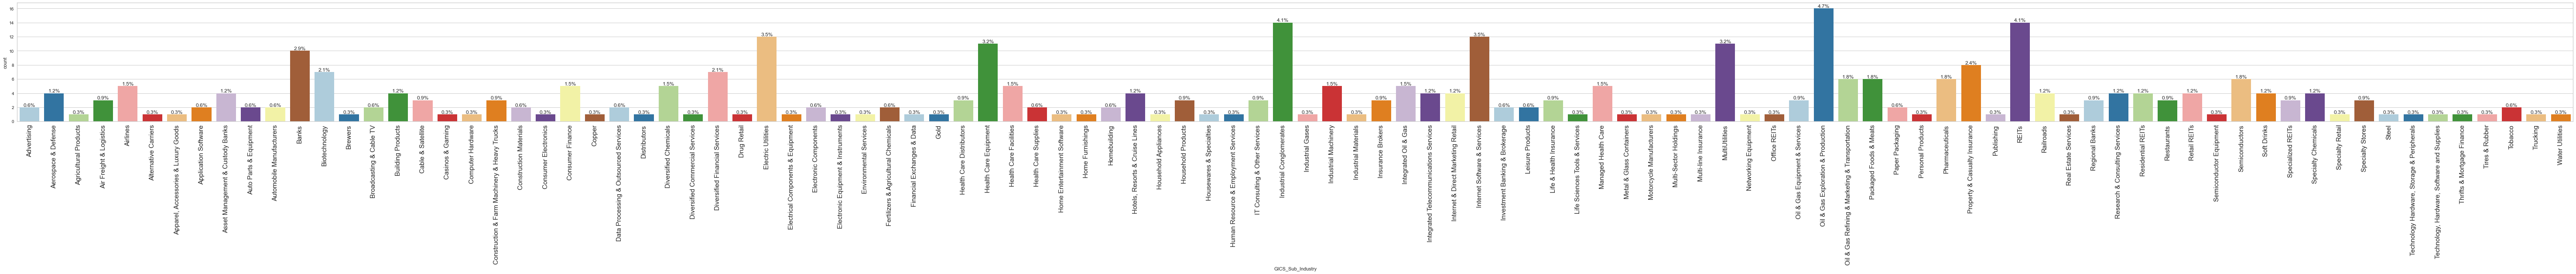

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [309]:
for item in cat_col:
    labeled_barplot(df, item, perc=True)

* Observations
* Most of the stocks in this dataset is dominated by the Industrials sector having 15.6% 
* The next sector after Industrials is Financials having 14.4% followed by Health care and Consumer Discretionary having 11.8%
* We are unable to visualize GICS Sub Industry using the labeled barplot due to the volume of 104 types of Sub Industries. We will extract the data into a subframe and look at the ones with having count more than or equal to 10.

In [310]:
dfsubindustry = df[["GICS_Sector", "GICS_Sub_Industry"]]
subindustries = dfsubindustry.groupby(["GICS_Sub_Industry"])
subindustriesgrp = subindustries.count()
subindustriesgrp.rename(columns={"GICS_Sector": "cnt"}, inplace=True)
subindustriesgt10 = subindustriesgrp[(subindustriesgrp.cnt >= 10)]
subindustriesgt10.sort_values(by=["cnt"], ascending=False)

,cnt
GICS_Sub_Industry,
Oil & Gas Exploration & Production,16
Industrial Conglomerates,14
REITs,14
Electric Utilities,12
Internet Software & Services,12
Health Care Equipment,11
MultiUtilities,11
Banks,10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* The Oil,gas exploration & production is the highest followed by Industrial conglomerates and REITs

## Bivariate Analsysis

### Let's check for correlations.

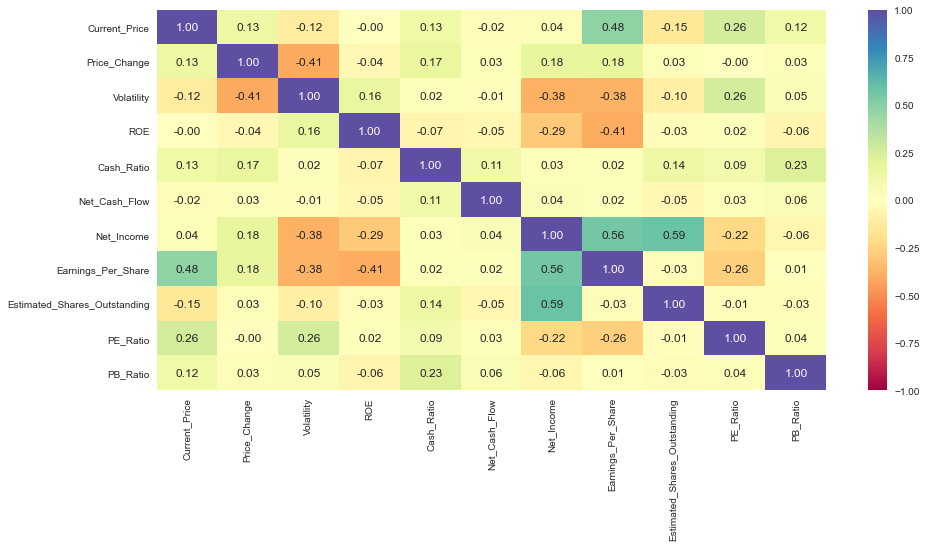

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [311]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Observations
* None of the variables are positively or negatively correlated to each other as the score is below 0.50 or -0.50
* There is a moderate correlation between Net income and estimated shares outstanding and earnings per share
* This is understandable as earnings per share increase when net income increases
* The estimated shares outstanding metric is related to net income. As the net income increases,the estimated shares outstanding also increases  

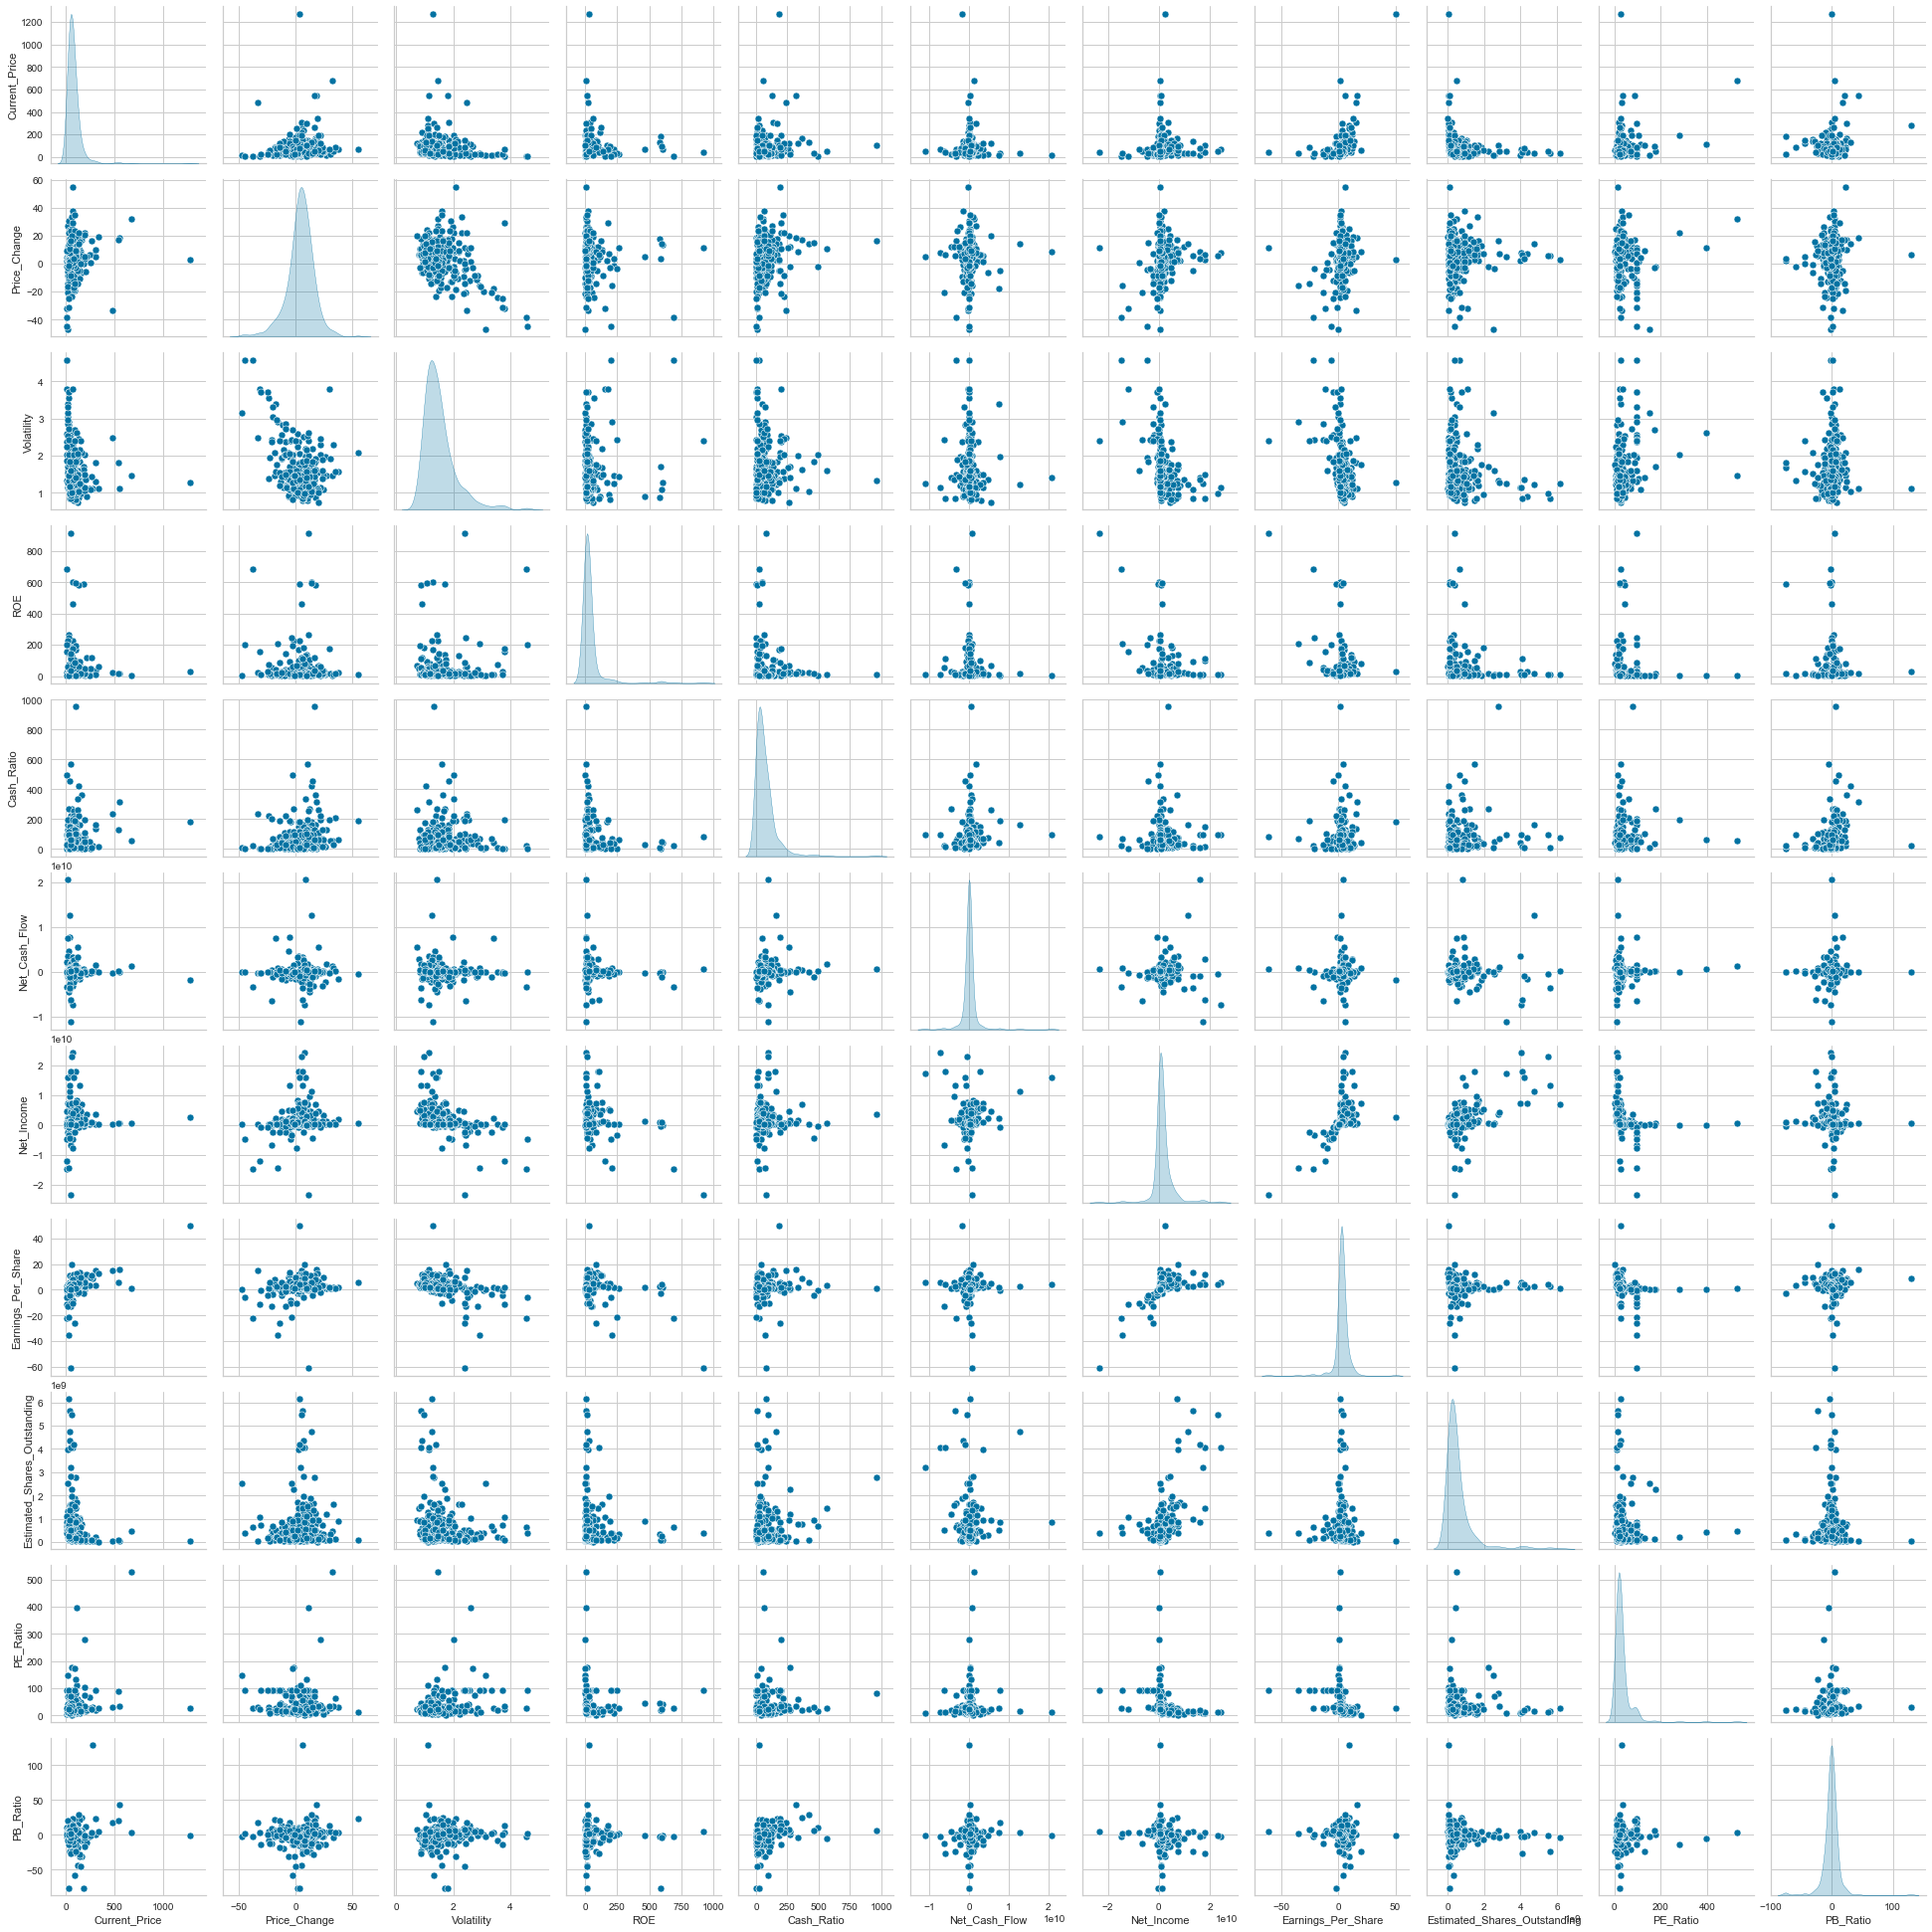

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [312]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

* Observations
* Net cash flow,Net Income,Earnings per share,PE ratio and price change have close to normal distributions
* The distribution in rest of the variables is bimodal

In [313]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [314]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [315]:
# view first few records of scaled data
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,PE_Ratio,PB_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

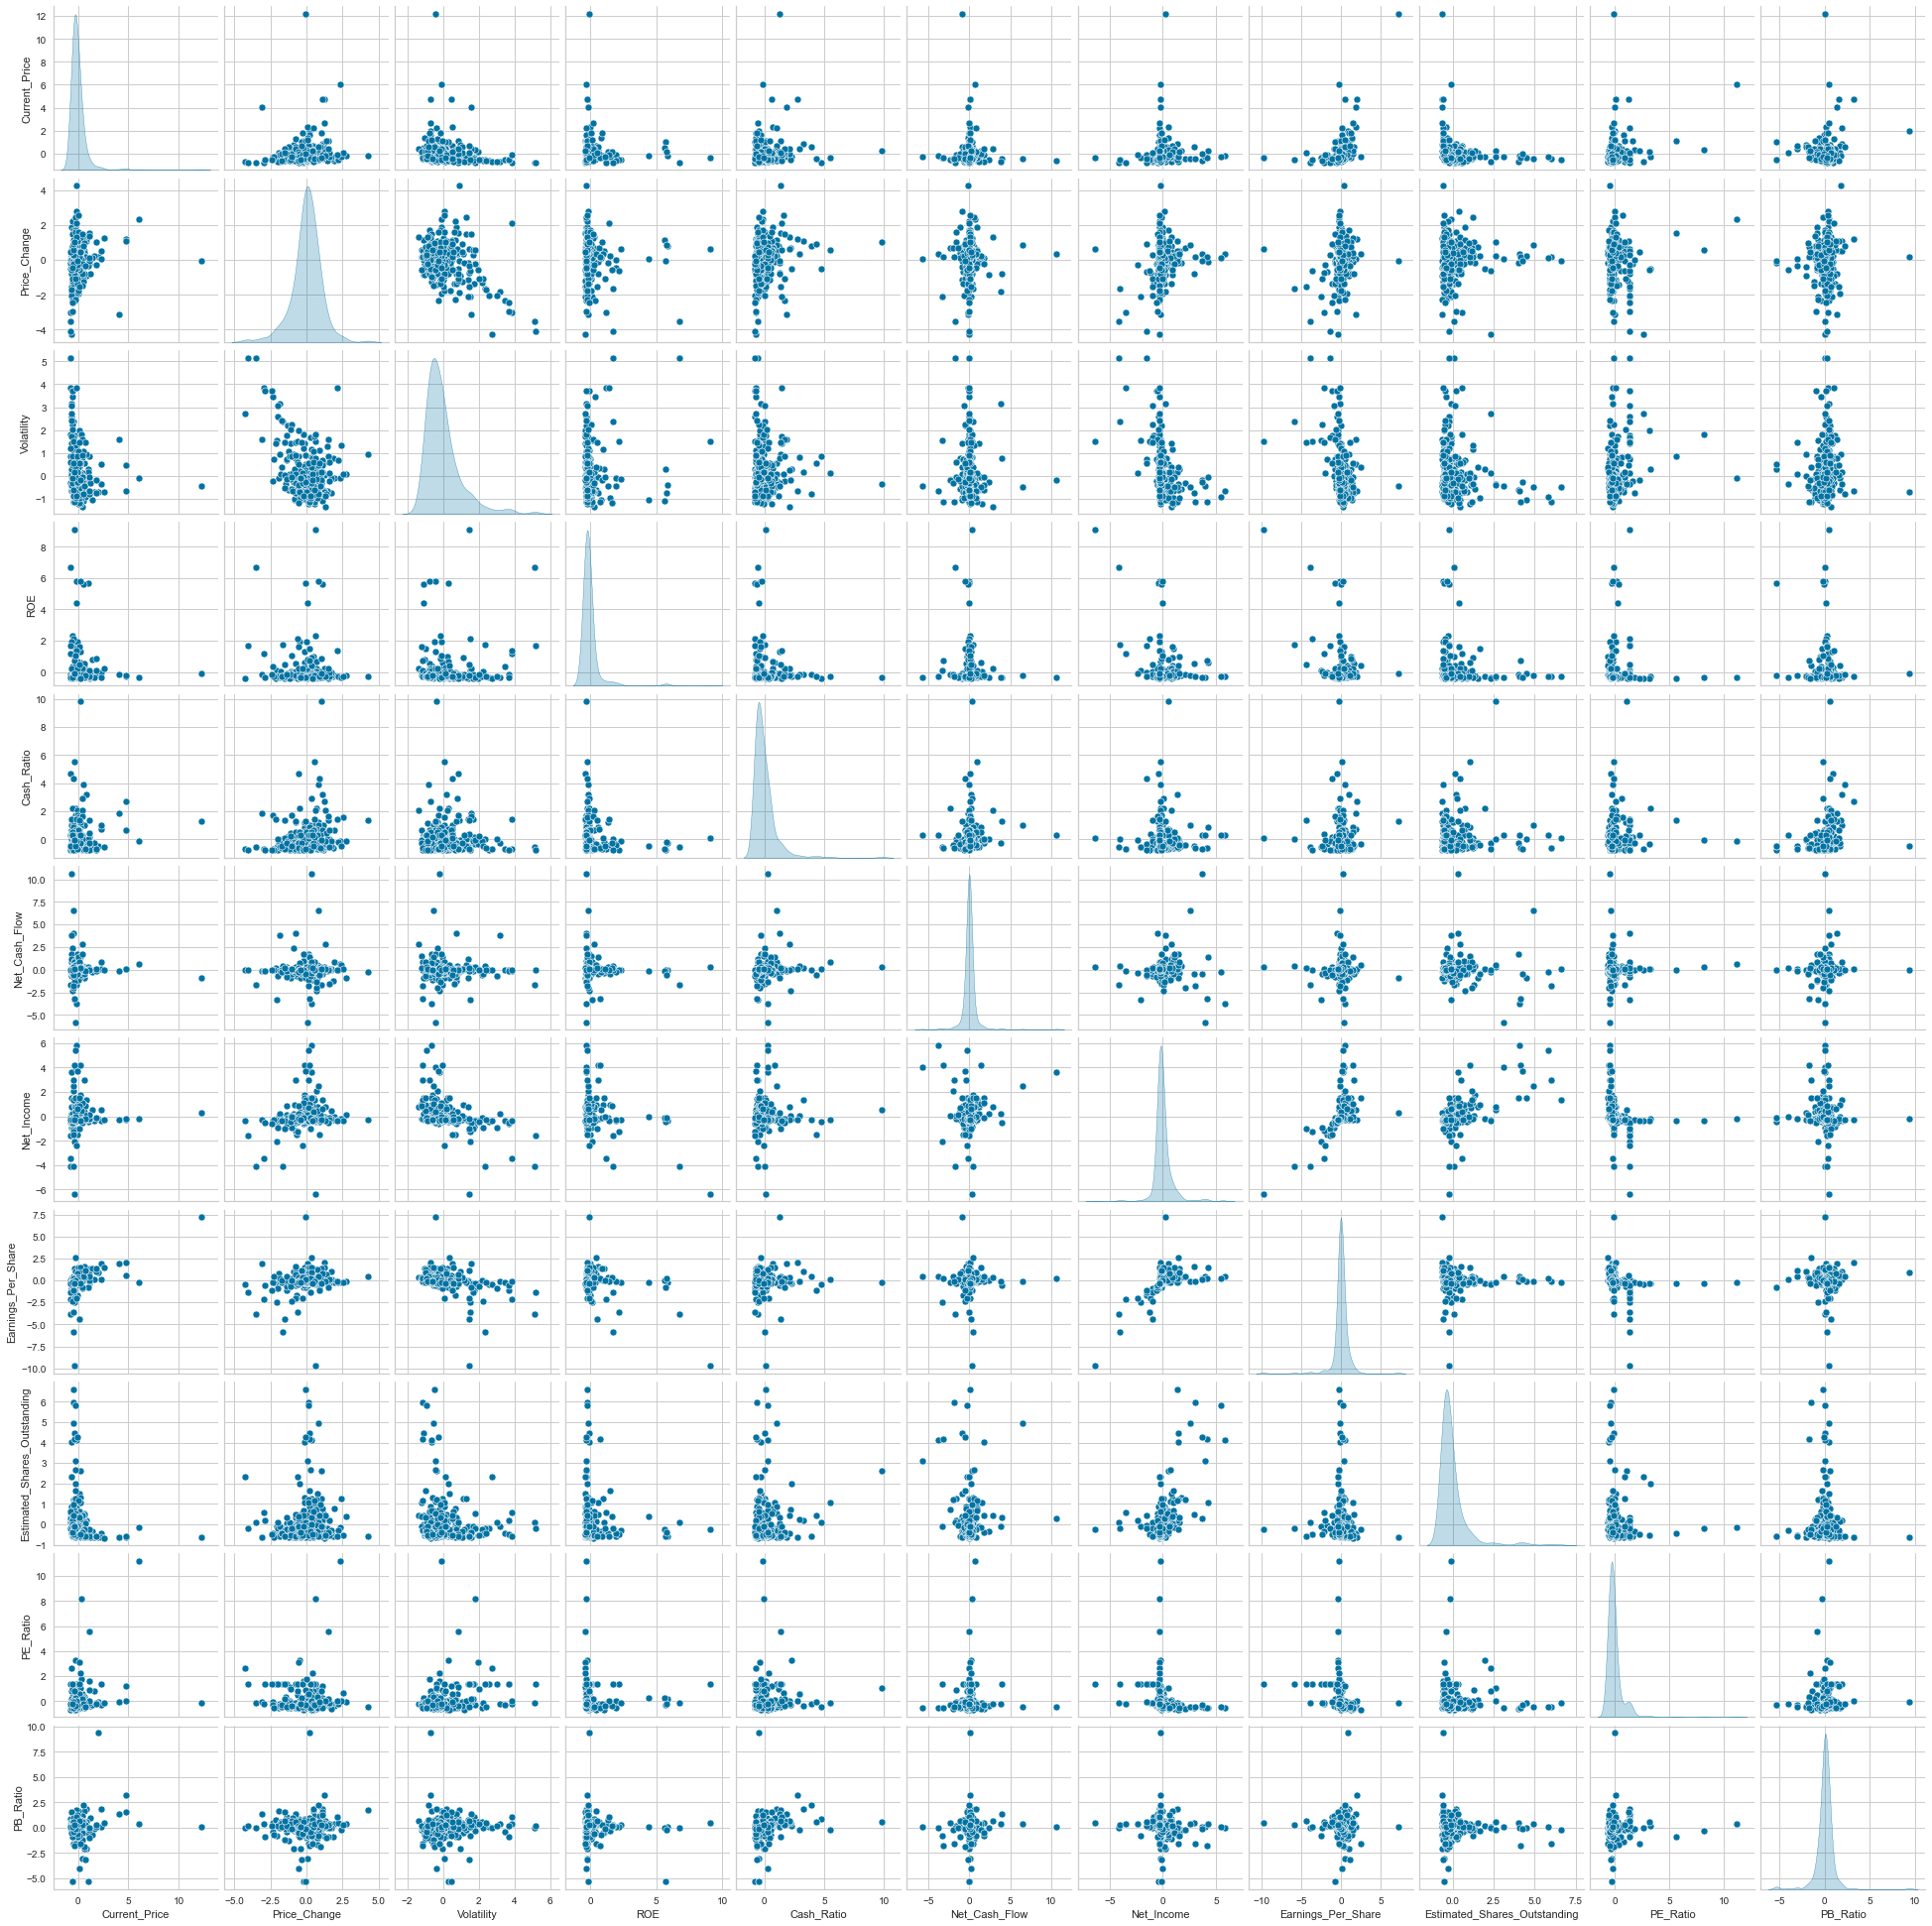

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [316]:
# review the pair plot of the scaled data
sns.pairplot(data=subset_scaled_df[num_col], diag_kind="kde")
plt.show()

C:\Users\l_ram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2652173220958
Number of Clusters: 4 	Average Distortion: 2.185137523646176
Number of Clusters: 5 	Average Distortion: 2.1118395153648377
Number of Clusters: 6 	Average Distortion: 2.0571450759992183
Number of Clusters: 7 	Average Distortion: 2.030706865145344
Number of Clusters: 8 	Average Distortion: 1.9972848024643965
Number of Clusters: 9 	Average Distortion: 1.9188879214336636


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

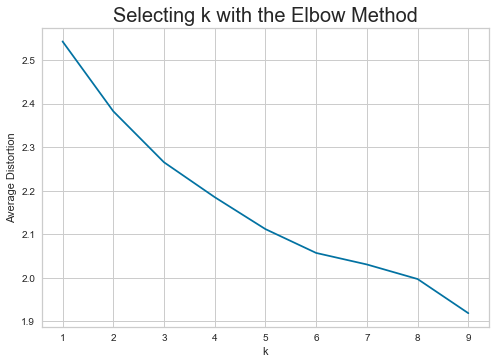

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [317]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* Observations 
* The appropriate value of k from the elbow curve seems to be 3 or 5.

### Let's check the silhouette scores.

For n_clusters = 2, silhouette score is 0.4364805522329805
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.3536294114640298
For n_clusters = 6, silhouette score is 0.41980387501128924
For n_clusters = 7, silhouette score is 0.4067107259120999
For n_clusters = 8, silhouette score is 0.3862005444919414
For n_clusters = 9, silhouette score is 0.3973212328766629


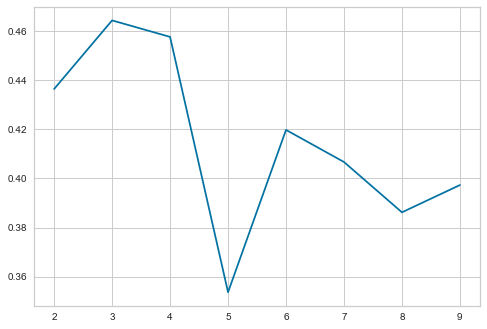

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [318]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* Observations 
* From the silhouette scores, it seems that 3,4 and 5 are good values of k.
* At 5 it is tapering off and becoming almost straight line 

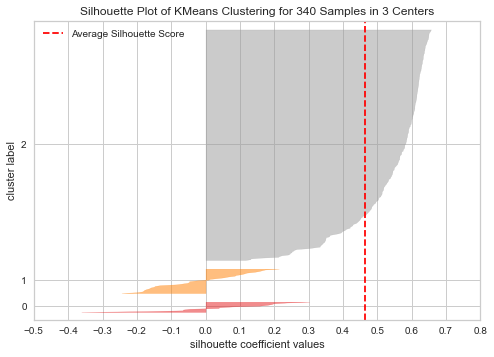

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [319]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

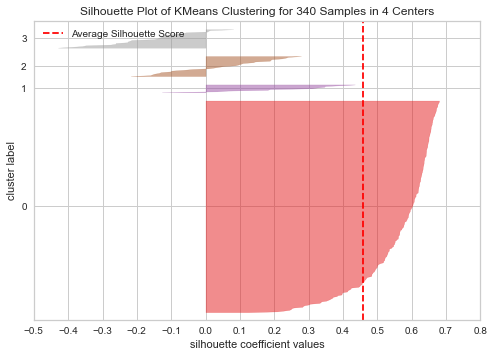

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [320]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

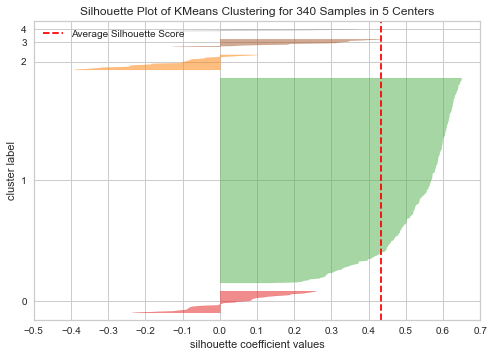

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [321]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* Observations 
* Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.

In [322]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [323]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [324]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [325]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["GICS_Sector"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [326]:
# Print the unique sector names in these K-means clusters
# let's see the names of the sectors in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["GICS_Sector"].nunique(),
        "GICS sector in K_means_segment clusters",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["GICS_Sector"].unique())
    print("-" * 100, "\n")


The 11 GICS sector in K_means_segment clusters 4 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 6 GICS sector in K_means_segment clusters 0 are:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Consumer Staples']
---------------------------------------------------------------------------------------------------- 

The 6 GICS sector in K_means_segment clusters 1 are:
['Information Technology' 'Energy' 'Industrials' 'Materials' 'Financials'
 'Consumer Discretionary']
---------------------------------------------------------------------------------------------------- 

The 5 GICS sector in K_means_segment clusters 3 are:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consum

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [327]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,PE_Ratio,PB_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,259


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

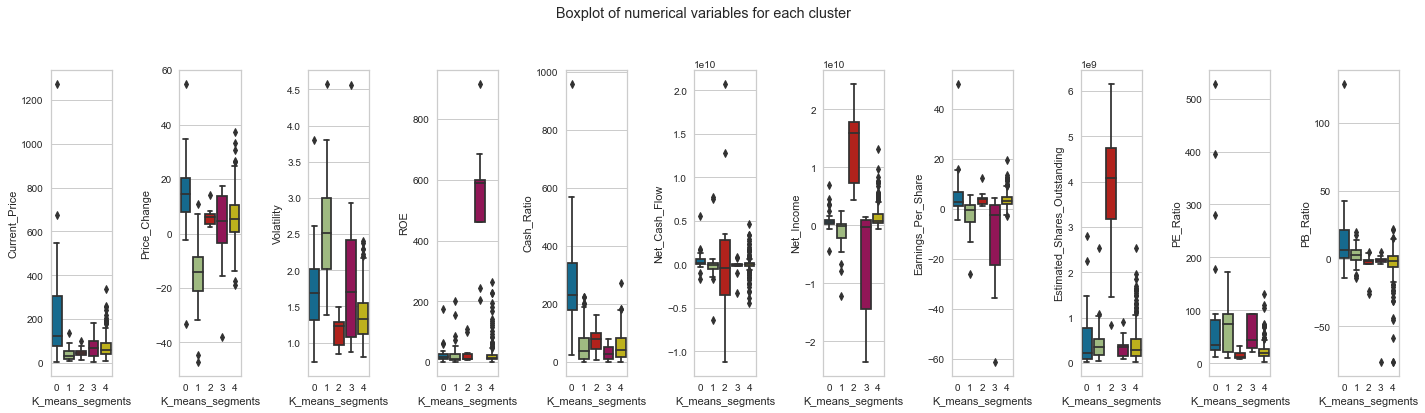

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [328]:
fig, axes = plt.subplots(1, 11, figsize=(20, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

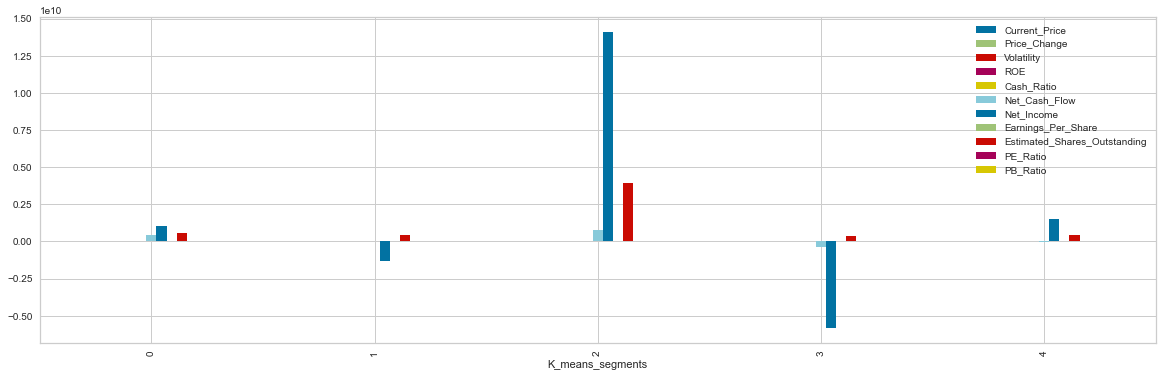

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [329]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(20, 6))

### Insights

- **Cluster 0**:
    - The portfolio of 6 sectors in cluster 0 are Information Technology,Health Care,Consumer Discretionary, Real Estate,Telecommunications Services and Consumer Staples
    - The current price,price change,volatility,ROE,cash ratio are low to moderate
    - The net cash flow is low
    - The net income,estimated shares outstanding are high
    - The earnings per share is low to moderate
    - The PE ratio is low to moderate
    - However the PB ratio is negative which makes this cluster less attractive for investments  
    - This segement has investment risks due to the book value of the companies
    
- **Cluster 1**:
    - The portfolio of 6 sectors in cluster 1 are Information Technology,Energy,Industrials,Materials,Financials and Consumer Discretionary
    - The current price,price change,volatility,ROE,cash ratio are low to moderate
    - The net cash flow is very low
    - The net income,estimated shares outstanding are high
    - The earnings per share is low to moderate
    - The PE and PB ratio are low to moderate
    - The ROE metric is moderate which indicates that the companies has lesser debts
    - Overall this cluster is attractive for investments as PE,PB metrics are better compared to the other clusters 

- **Cluster 2**:
    - The portfolio of 7 sectors in cluster 2 are Financials,Consumer Discretionary,Health Care,Information Technology,Consumer Staples,Telecommunications Services and Energy
    - The current price,price change,volatility,ROE,cash ratio are low to moderate
    - The net cash flow is in negative
    - The net income,estimated shares outstanding are high
    - The earnings per share is low to moderate
    - The PE ratio is low to moderate
    - However the PB ratio is highly negative which makes this cluster less attractive for investments
    - Overall this cluster is highly risky for investment due to the net income and PB ratio being negative 
    - Investors are strongly advised to refrain from investing in this cluster
 
- **Cluster 3**:
    - The portfolio of 5 sectors in this cluster are Industrials,Energy,Consumer Discretionary,Consumer Staples and Financials
    - The current price,volatility,ROE,cash ratio are low to moderate
    - The price change,net cash flow,net income and earnings per share are negative
    - The estimated shares outstanding are high
    - The PE ratio is low to moderate. However the PB ratio is low.
    - Overall there is significant risk of invesment in this cluster due to the earnings per share being in negative
    - The other driving factors for not investing in this cluster is due to the loss in income and cash flow and negative price changes
    - The above are clear indicators that the companines in this cluster are not doing well based on their core financial metrics
    
    
- **Cluster 4**:
    - The portfolio of 11 sectors in this cluster are Industrials,Health Care,Information Technology,Consumer Staples, Utilities,Financials,Real Estate,Materials,Consumer Discretionary,Telecommunications Services and Energy
    - The current price,volatility,ROE,cash ratio are low to moderate
    - The price change is in negative. This could possibly be due to the cyclic nature of these companies in this cluster
    - The net income and estimated shares outstanding are high
    - The earnings per share is low to moderate
    - The PE and PB ratio are low to moderate
    - Overall this cluster is attractive for investments as the financial metrics of net income,PB,PE and ROE ratios are in good state
    - The price change should be analyzed for more than 13 weeks to understand the risks due to negative price change in this cluster

### Business Recommendations based of K-means clustering

* Cluster 1 is the clear winner for investment. This cluster is well balanced in terms of the net income,PE,PB and ROE metrics. This cluster poses less risks for making losses. 

* Cluster 0 and Cluster 4 are next set of cluster for potential investments. Cluster 0 has risk in terms of the PB ratio being negative. It is possible that the book value of the companies are not reflecting correctly. Once the PB metric is analyzed with the current status,it is possible that the values will become positive and hence the investment will have a low risk of making losses. Cluster 4 has risk in terms of the negative price change. This may be due to the current macro economic conditions such as the inflation rate,oil prices and climate affecting the performance of these companies. Further data analysis of the companines in this cluster should be considered for better assessment. The history of data has to be analyzed for longer period of data to make a clear assessment for this cluster

* Cluster 2 and Cluster 3 are strong cases for non investments.Investors should refrain from investing in these two clusters. With cluster 2 it is clear that the companies are not making any income as they are in negative numbers. The PB ratio is in negative which converges with the fact of the companies not making any income in this cluster. With cluster 3, the earnings per share is negative along with the loss in income and cash flow. These are clear indicators of risk for investment with this cluster 

### Hierarchial clustering

In [330]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [331]:
# copying the data to another variable to avoid any changes to original data
dfhc = data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [332]:
# Standardize column names by replacing spaces with underscore and removing slash in column names
dfhc.columns = dfhc.columns.str.replace(" ", "_")
dfhc.columns = dfhc.columns.str.replace("/", "")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [333]:
dfhc.drop(columns=["Ticker_Symbol", "Security"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [334]:
# Store numerical column names in a variable and print it
num_col = dfhc.select_dtypes(include=np.number).columns.tolist()
print(num_col)

['Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio', 'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share', 'Estimated_Shares_Outstanding', 'PE_Ratio', 'PB_Ratio']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [335]:
dfhc.head()

,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,PE_Ratio,PB_Ratio
0,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [336]:
# Scaling the data set before clustering

# scaler = StandardScaler()
# subset = dfhc[num_col].copy()
# subset.head()
# subset_scaled_df = pd.DataFrame(scaler.fit_transform(subset, columns=subset.columns))
# subset_scaled_df.head()


sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(dfhc.drop(["GICS_Sector", "GICS_Sub_Industry"], axis=1)),
    columns=dfhc.drop(["GICS_Sector", "GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,PE_Ratio,PB_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Start Hierarchial clustering

In [337]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750721.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [338]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [339]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [340]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

**Let's see the dendrograms for the different linkage methods.

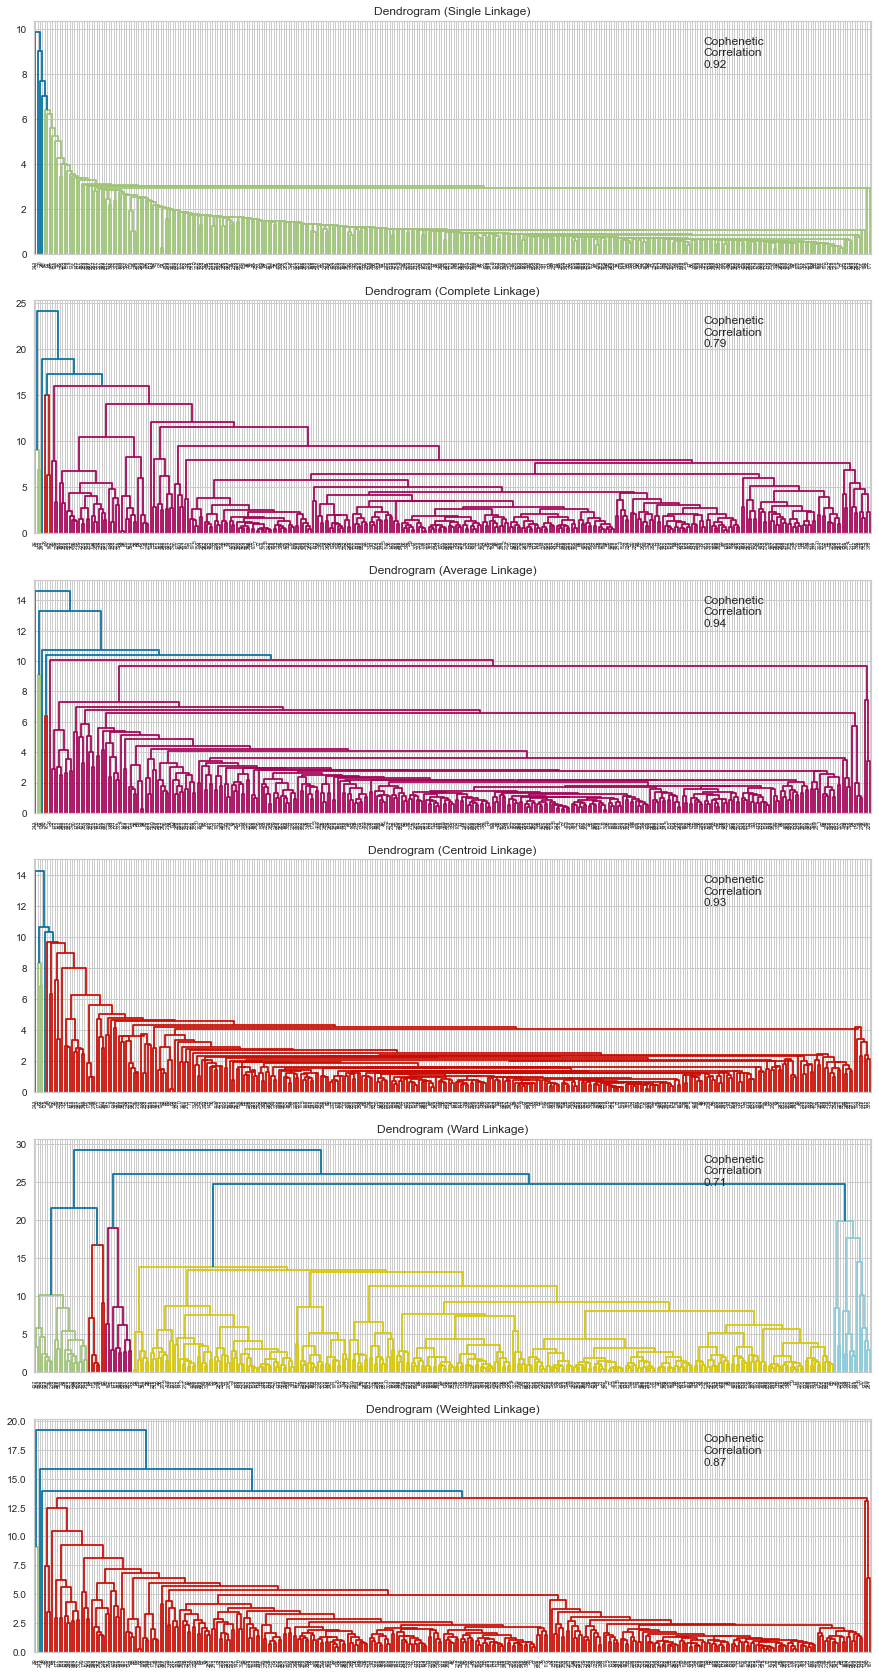

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [341]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage as it has the highest score of 0.94
- 10 appears to be the appropriate number of clusters from the dendrogram for average linkage.

## Cluster Profiling

In [342]:
HCmodel_avg = AgglomerativeClustering(
    n_clusters=10, affinity="euclidean", linkage="average"
)
HCmodel_avg.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [343]:
subset_scaled_df["HC_Clusters_Avg"] = HCmodel_avg.labels_
dfhc["HC_Clusters_Avg"] = HCmodel_avg.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [344]:
cluster_profile_avg = dfhc.groupby("HC_Clusters_Avg").mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [345]:
cluster_profile_avg["count_in_each_segments"] = (
    dfhc.groupby("HC_Clusters_Avg")["GICS_Sector"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [346]:
print(cluster_profile_avg["count_in_each_segments"])

HC_Clusters_Avg
0    321
1      2
2      2
3      1
4      9
5      1
6      1
7      1
8      1
9      1
Name: count_in_each_segments, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [347]:
# let's see the names of the sectors in each cluster
for cl in dfhc["HC_Clusters_Avg"].unique():
    print(
        "The",
        dfhc[dfhc["HC_Clusters_Avg"] == cl]["GICS_Sector"].nunique(),
        "GICS sector in cluster",
        cl,
        "are:",
    )
    print(dfhc[dfhc["HC_Clusters_Avg"] == cl]["GICS_Sector"].unique())
    print("-" * 100, "\n")

The 11 GICS sector in cluster 0 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']
---------------------------------------------------------------------------------------------------- 

The 1 GICS sector in cluster 5 are:
['Information Technology']
---------------------------------------------------------------------------------------------------- 

The 2 GICS sector in cluster 2 are:
['Health Care' 'Information Technology']
---------------------------------------------------------------------------------------------------- 

The 1 GICS sector in cluster 8 are:
['Consumer Discretionary']
---------------------------------------------------------------------------------------------------- 

The 1 GICS sector in cluster 7 are:
['Energy']
---------------------------------------------------------------------------------------------------- 

The 2 G

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* Cluster 0 and Cluster 4 are showing variability
* With the other Clusters there are mostly 1 or 2 sectors in each of them.Among them Cluster 1 and Cluster 2 are showing variability with each having 2 sectors 
* Let us try using the centroid linkage method that had very close score with the average method and examine the clusters
* With the centroid linkage method,I am getting the beow value error below despite having the latest version of scikit-learn and SciPy
* ValueError: Unknown linkage type centroid. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])
* Because of this I am choosing to go with the highest linkage method of average which had a cophentic correlation score of 0.94

In [348]:
# lets display cluster profile
cluster_profile_avg.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,PE_Ratio,PB_Ratio,count_in_each_segments
HC_Clusters_Avg,,,,,,,,,,,,
0,75.812141,3.903298,1.525584,35.919003,66.775701,44288380.062305,1176573903.426791,2.889798,450041271.641277,29.469645,-2.028330,321
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,152.564999,16.742017,2.314435,4.000000,130.000000,380861000.000000,133320500.000000,0.485000,317332352.950000,337.464244,-9.935778,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,4.500000,-38.101788,4.559815,687.000000,22.000000,-3283000000.000000,-14685000000.000000,-22.430000,654703522.100000,28.407929,-1.840528,1
7,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1
8,675.890015,32.268105,1.460386,4.000000,58.000000,1333000000.000000,596000000.000000,1.280000,465625000.000000,528.039074,3.904430,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [349]:
# cluster_profile_avg.to_csv("Cluster_profile.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

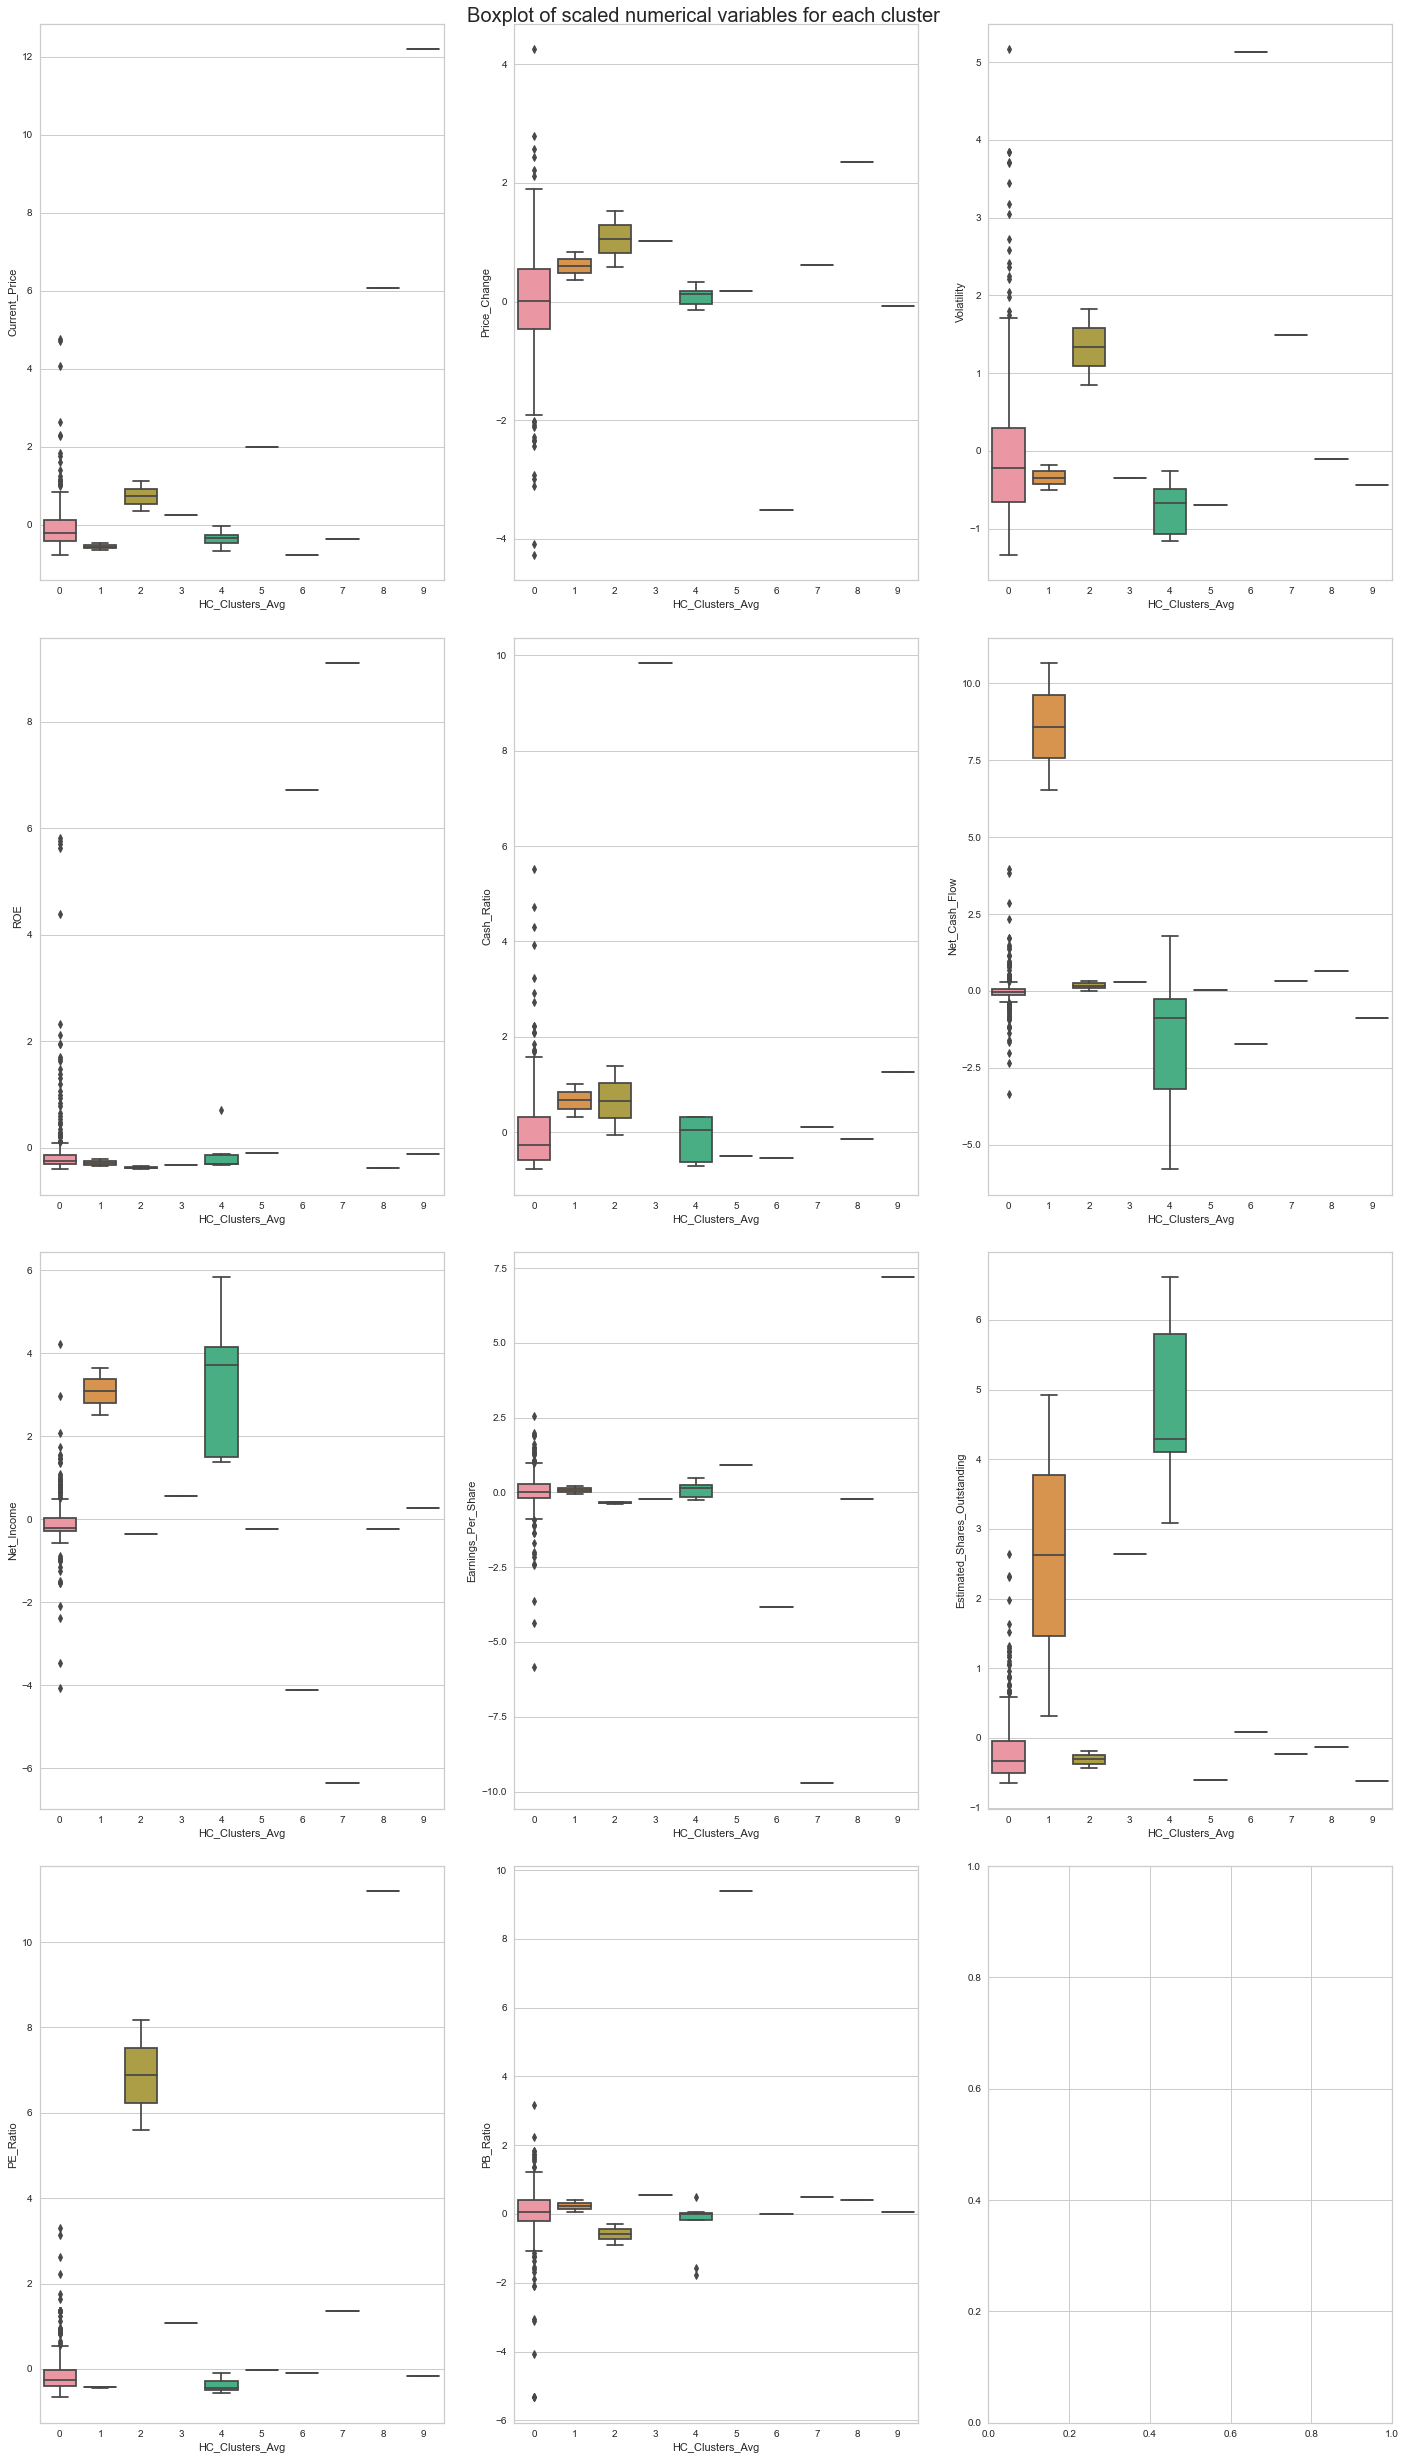

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [350]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for i in range(2):
    if counter >= 9:
        #       print the 9th and 10 th columns
        sns.boxplot(
            ax=axes[3][0],
            y=subset_scaled_df[num_col[9]],
            x=subset_scaled_df["HC_Clusters_Avg"],
        )
        sns.boxplot(
            ax=axes[3][1],
            y=subset_scaled_df[num_col[10]],
            x=subset_scaled_df["HC_Clusters_Avg"],
        )
    elif counter < 8:
        for ii in range(3):
            sns.boxplot(
                ax=axes[ii][0],
                y=subset_scaled_df[num_col[counter]],
                x=subset_scaled_df["HC_Clusters_Avg"],
            )
            counter = counter + 1
            sns.boxplot(
                ax=axes[ii][1],
                y=subset_scaled_df[num_col[counter]],
                x=subset_scaled_df["HC_Clusters_Avg"],
            )
            counter = counter + 1
            sns.boxplot(
                ax=axes[ii][2],
                y=subset_scaled_df[num_col[counter]],
                x=subset_scaled_df["HC_Clusters_Avg"],
            )
            counter = counter + 1
fig.tight_layout(pad=2.0)

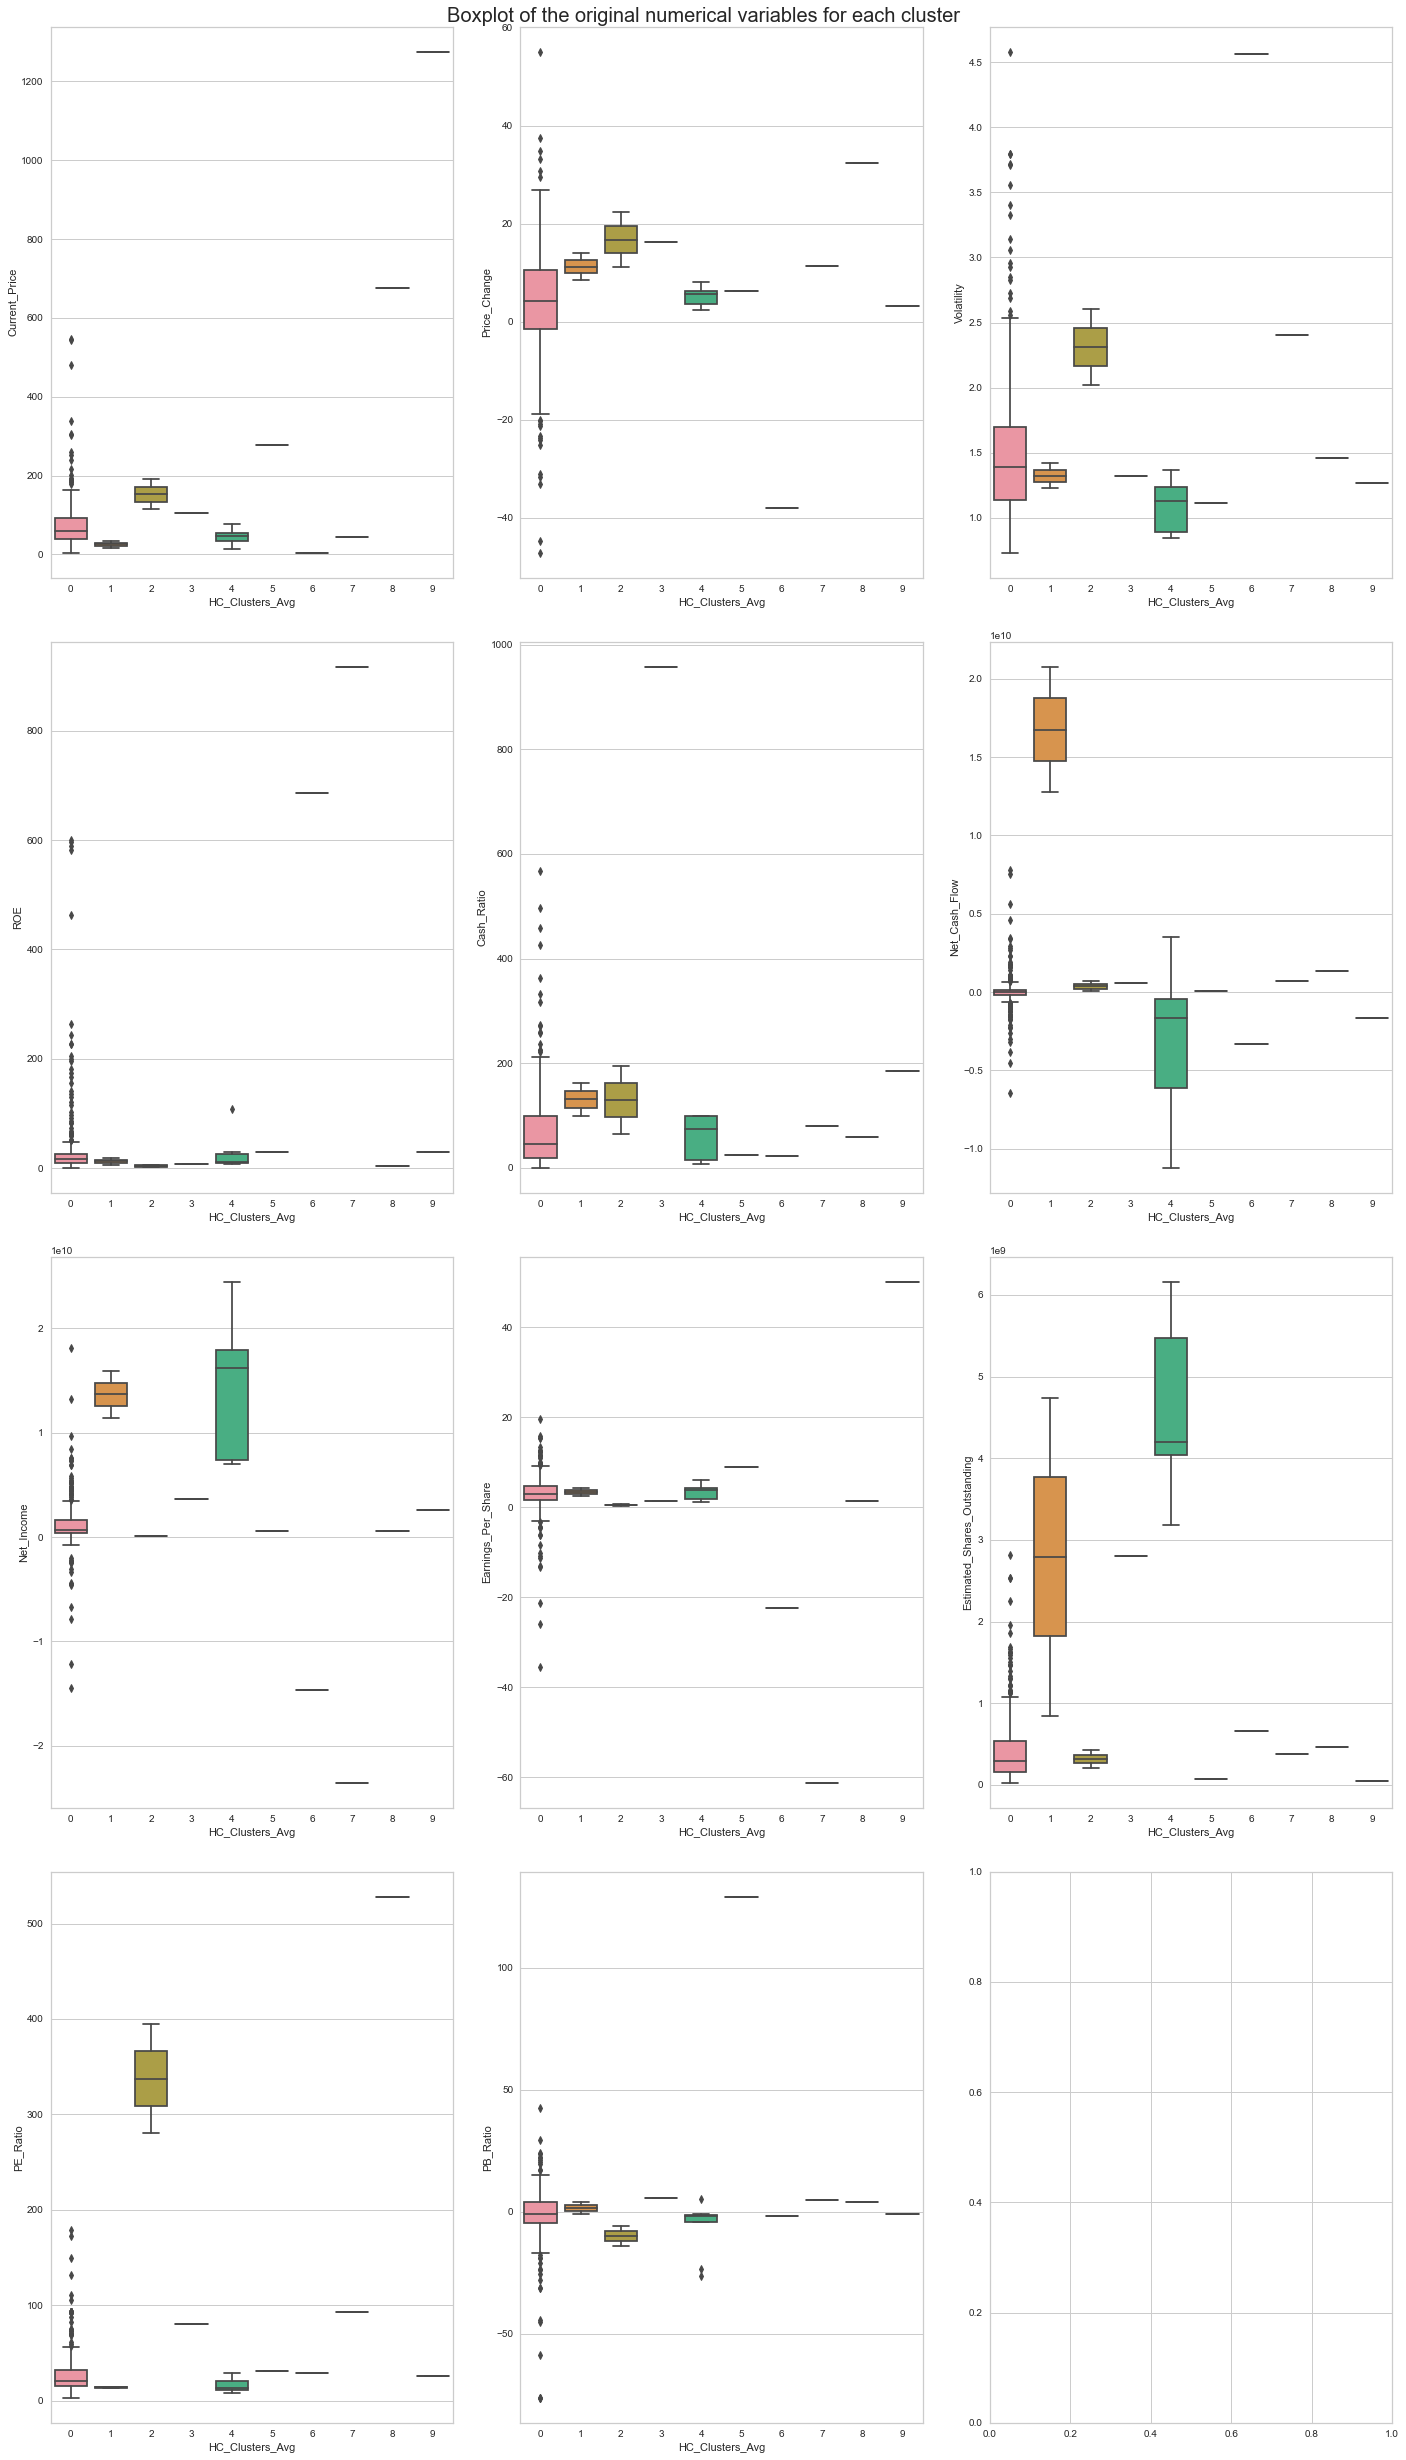

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [351]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle(
    "Boxplot of the original numerical variables for each cluster", fontsize=20
)
counter = 0
for i in range(2):
    if counter >= 9:
        #       print the 9th and 10 th columns
        sns.boxplot(
            ax=axes[3][0],
            y=dfhc[num_col[9]],
            x=dfhc["HC_Clusters_Avg"],
        )
        sns.boxplot(
            ax=axes[3][1],
            y=dfhc[num_col[10]],
            x=dfhc["HC_Clusters_Avg"],
        )
    elif counter < 8:
        for ii in range(3):
            sns.boxplot(
                ax=axes[ii][0],
                y=dfhc[num_col[counter]],
                x=dfhc["HC_Clusters_Avg"],
            )
            counter = counter + 1
            sns.boxplot(
                ax=axes[ii][1],
                y=dfhc[num_col[counter]],
                x=dfhc["HC_Clusters_Avg"],
            )
            counter = counter + 1
            sns.boxplot(
                ax=axes[ii][2],
                y=dfhc[num_col[counter]],
                x=dfhc["HC_Clusters_Avg"],
            )
            counter = counter + 1
fig.tight_layout(pad=2.0)

## Insights

* We will look into clusters 0 and 4 as they have a variability of sectors. We will also look at 1 as they have more than one sector

- **Cluster 0**
   - Cluster zero has a variability of the 11 sectors consisting of Industrials,Health Care,Information Technology,Consumer Staples,Utilities,Financials,Real Estate,Materials,Consumer Discretionary,Energy and Telecommunications Services. This diversifies the portfolio of investment and reduces the risk
   - Cluster zero has in total about 321 companies that fall in the 11 sectors. There is a wider choice among these companies to pick and choose for investments
   - Cluster zero has a good net cash flow and net income range. 
   - The ROE in Cluster zero which is indicator of the assets minus debts is standing at 35.9 which is good comparing it with the combination of all other metrics
   - There is low price volatility and change. Volatility is 1.52% and price change is ~3.9 dollars
   - The earnings per share is low to moderate of 2.88 dollars. The PB ratio is moderate indicating it is earning moderately for the investors without huge fluctuations
   - The current price of share is 75 dollars which is higher for first-time investors
   - Overall Cluster 0 is a diversified portfolio with lower risk and is a good source of long term investments

- **Cluster 4**
    - Cluster 4 has 6 sectors consisting of Financials,Consumer Discretionary,Consumer Staples,Health Care,Telecommunications Services and Energy
    - Cluster 4 has 9 companies that fall in the above 6 sectors. This is a much smaller portfolio as compared to that of Cluster 0
    - The highlight of this portfolio is that it has the highest value in terms of the net income. This indicates that these Companies are generating more revenue while controlling expenses, production costs, and overhead.
    - The earnings per share is 3.4 dollars which is moderate but higher than Cluster 0
    - The ROE is moderate standing at 25 which is not bad
    - There is low price volatility but the change is slightly higher compared to Cluster 0. Volatility is 1.07% and price change is ~5.16 dollars
    - The net cash flow however is in negative which indicates the companies is spending more money than it makes during the 13 week period 
    - The current price of the share is 46 dollars which is moderate to high for first-time investors 
    - Overall Cluster 4 is a smaller portfolio with a moderate risk level and can be considered for short to medium term
 
 - **Cluster 1**
    - Cluster 1 has 2 sectors consisting of Financials and Information Technology
    - Cluster 1 is a tiny portfolio consisting of just 2 companies
    - While the portfolio is skewed with just 2 companies, this Cluster is topping the list in terms of the net cash flow which indicates that these companies are liquid and has a higher probability of paying off its debts, paying dividends to shareholders, and paying its operating expenses
    - The earnings per share is 3.2 dollars which is moderate but lower than Cluster 4
    - The highlight of this portfolio is the current price of the share which is 25 dollars. This is the lowest in terms of the four clusters in comparison
    - The Cluster 1 has good net income in addition to the net cash flow. The good net income indicates that these companies effectively control its costs and/or provide goods or services at a price significantly higher than its costs.
    - Overall Cluster 1 is a smaller portfolio with low risk levels and can be considered for long term investments
 
   
## Recommendations

**Cluster 0 and 1 are good long term investments. Cluster 4 can be considered for short to medium term investments **
** Financials and Information Technology are the common denominator in the clusters **

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [352]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [353]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.37149420138540845

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- **The first two principal components explain 37.1% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

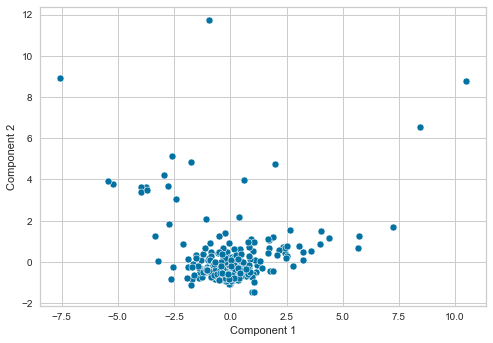

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [354]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- ** We can kind of see two broad clusters if we draw a horizontal line around y=1.
- ** There a few outlier points too.
- ** Let's colour the scatterplot by cluster labels.

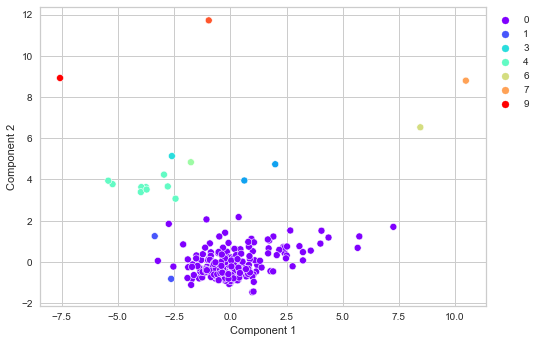

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [355]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=dfhc["HC_Clusters_Avg"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- ** Cluster 0 and 1 are the major clusters.
- ** The rest of the data points seem to be mostly outliers